# <span>Coletando e tratando os dados</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autor: Flávio Belizário da Silva Mota
    <br/><br/>
    Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contato: <a href="mailto:flavio.belizario.mota@gmail.com">flavio.belizario.mota@gmail.com</a>
    <br/>
    Professor: Rafael Santos
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar a etapa de coleta dos dados para o projeto da disciplina CAP394 - Introdução à Ciência de Dados. Os dados são provenientes do projeto CRISIS NLP e foram coletados utilizando publicações do Twitter referentes à pandemia de COVID-19. O conjunto contém informações geolocalizadas a respeito da origem da publicação e  se no corpo da publicação existem referências a outros locais, também são apresentadas as informações sobre esses locais. Esses dados são disponibilizados em formato json e podem ser baixados em arquivos que representam as publicações diárias. Nessa etapa de coleta, foram consideradas publicações feitas no Brasil.
</div>

<br/>
<div style="text-align: center;font-size: 90%;">
    <b>Os dados podem ser encontrados em:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    https://crisisnlp.qcri.org/covid19
    </div>
</div>

## O conjunto de dados
<hr style="border:2px solid #0077b9;">

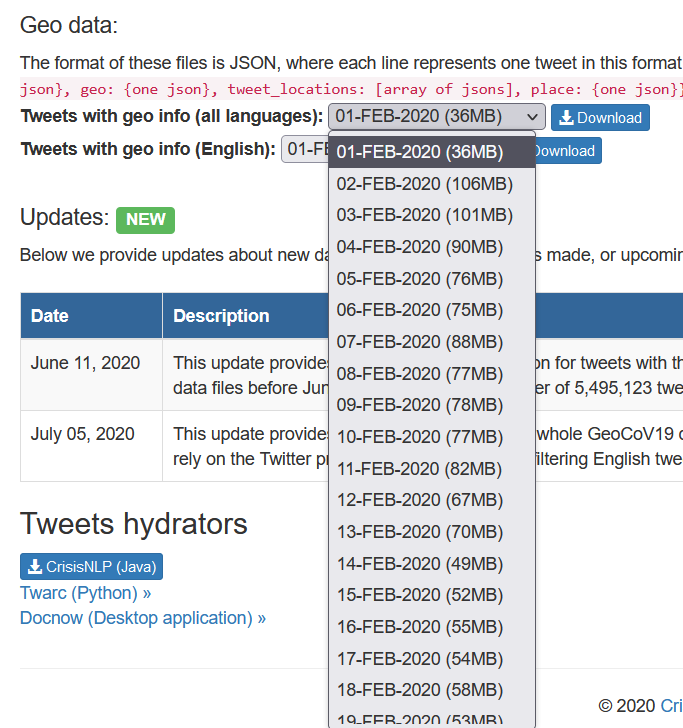<div>O conjunto de dados, chamado de GeoCoV19, foi elaborado através da coleta de dados do Twitter e contém mais de 524 milhões de <i>tweets</i> multilíngues coletados até 1º de maio de 2020. O conjunto contém cerca de 378 mil tweets com <i>geotags</i> e 5,4 milhões de <i>tweets</i> com informações sobre o local. Foram extraídos topônimos a partir do campo de localização do usuário e do conteúdo do <i>tweet</i> e essa informação foi transformada para geolocalizações, como país, estado ou cidade. Utilizando essa abordagem, 297 milhões de <i>tweets</i> foram associados a geolocalização usando o campo de localização do usuário e 452 milhões de <i>tweets</i> usando o conteúdo do <i>tweet</i>.</div>

<div>Os dados com informações geolocalizadas estão disponíveis para <i>download</i> em <a>https://crisisnlp.qcri.org/covid19</a> no formato <i>.zip</i>.

<figure>
    <img src='images/geo-download.png' style='display: block; margin-left: auto; margin-right: auto;'/>
    <figcaption style='text-align: center;'>Figura 1 - Seção de download dos arquivos.</figcaption>
</figure> <br/>

Cada arquivo <i>.zip</i> contém um JSON com os <i>tweets</i> de um dia. Para coletar todas as publicações, é necessário baixar cada arquivo individualmente, por dia.</div>
    
<figure>
    <img src='images/geo-download-datas.png' style='max-width:400px; max-height:400px; width: auto; height: auto; display: block; margin-left: auto; margin-right: auto;'/>
    <figcaption style='text-align: center;'>Figura 2 - Seleção do arquivo com tweets do dia.</figcaption>
</figure> <br/>

## Automatizando a coleta dos dados
<hr style="border:2px solid #0077b9;">

<div>Realizar a coleta dessas publicações manualmente seria extremamente trabalhoso. Sendo assim, utilizaremos os códigos a seguir para automatizar essa coleta, construindo ao final um único arquivo JSON com as publicações do Brasil.</div>
<br/>
<div> <b>Mas de que forma faremos isso, se é preciso selecionar o arquivo que queremos baixar?</b> 
<br/> Inspecionando a página do projeto é possível descobrir que ao selecionar o botão de <i>download</i>, uma função é executada:
</div>
<br/>
<figure>
    <img src="images/insp-geo-download.png" style='max-width:700px; max-height:600px; width: auto; height: auto; display: block; margin-left: auto; margin-right: auto;'/>
    <figcaption style='text-align: center;'>Figura 3 - Inspecionando o botão de download.</figcaption>
</figure>

<br/>
<div>
    Descobrimos que a função <code>geo_pass_selected()</code> é chamada quando selecionamos o arquivo que queremos baixar. Inspecionando os arquivos fonte da página, conseguimos identificar o que essa função faz:
</div>
<br/>
<figure>
    <img src="images/insp-geo-pass.png" style='max-width:700px; max-height:600px; width: auto; height: auto; display: block; margin-left: auto; margin-right: auto;'/>
    <figcaption style='text-align: center;'>Figura 4 - Identificando a função <code>geo_pass_selected()</code>.</figcaption>
</figure>
<br/>
<div>
    Podemos notar que a função constrói um nome para o arquivo a ser baixado concatenando "geo_" e ".zip" a um valor que é obtido do elemento de seleção da página. Podemos inspecionar esse elemento para entender o que são esses valores:
</div>
<br/>
<figure>
    <img src="images/insp-geo-dates.png" style='max-width:900px; max-height:800px; width: auto; height: auto; display: block; margin-left: auto; margin-right: auto;'/>
    <figcaption style='text-align: center;'>Figura 5 - Inspecionando o componente de seleção do arquivo.</figcaption>
</figure>
<br/>
<div>
    Analisando o código javascript acima, podemos notar que os valores utilizados para preencher as opções do componente de seleção são gerados através de um laço de repetição que itera de uma data de início (01/02/2020) até uma data de fim (01/05/2020). Dessa forma, o nome do arquivo a ser baixado tem o formato "geo_2020-02-01.zip", por exemplo. A função, em seguida, concatena uma <i>url</i> <code>/covid_data/geo_files/</code> ao nome do arquivo para então disponibilizar o <i>download</i>. O arquivo baixado é um <i>.zip</i>, sendo necessário extrair seu conteúdo, para poder manipular o arquivo JSON contendo as publicações do dia.
</div>
<br/>
<div>
    Analisando o número de publicações diárias na imagem a seguir, é possível notar um aumento a partir do dia 21 de fevereiro de 2020 e um segundo aumento a partir do dia 9 de março de 2020. Oficialmente, a Organização Mundial da Saúde (OMS) declarou estado de pandemia do novo Coronavírus em 11 de março de 2020 (<a href="https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/11/oms-declara-pandemia-de-coronavirus.ghtml">G1</a>), onde também é possível notar um aumento no número de publicações.
</div>
<br/>
<figure>
    <img src="images/daily_tweet_distribution.png" style='max-width:900px; max-height:800px; width: auto; height: auto; display: block; margin-left: auto; margin-right: auto;'/>
    <figcaption style='text-align: center;'>Figura 6 - Distribuição diária de publicações entre 1º de fevereiro e 1º de maio de 2020.</figcaption>
</figure>
<br/>
<div>
    Considerando o volume de dados no intervalo, visando tornar o processamento e análise processos menos custosos em termos de tempo e recurso, serão coletadas as publicações entre os dias 19 de fevereiro e 20 de março de 2020, contemplando assim um intervalo de 30 dias com publicações anteriores e posteriores ao decreto da OMS. 
</div>
<br/>
<div>
    De posse das informações apresentadas anteriormente, a automatização do processo de coleta dos dados pode ser descrito como as seguintes etapas:
    <br/>
    <ul>
        <li>Criação de uma lista de datas no intervalo 19/02/2020 até 20/03/2020;</li>
        <li>Iterar pelas datas dessa lista construindo o nome e <i>url</i> do arquivo a ser baixado;</li>
        <li>Realizar o <i>download</i> do arquivo;</li>
        <li>Extrair o conteúdo do arquivo <i>.zip</i> baixado;</li>
        <li>Analisar o arquivo JSON buscando pelas publicações feitas no Brasil;</li>
        <li>Gerar um novo arquivo JSON com essas publicações;</li>
        <li>Apagar o arquivo baixado para que ele não ocupe muito espaço em disco (considerando que os arquivos em sua maioria ocupam mais de 100 MB).</li>
    </ul>
</div>

### Instalando e importando as bibliotecas
<hr style="border:1px solid #0077b9;">


Instalando a biblioteca <code>wget</code> para realizar o download dos arquivos:

In [1]:
!pip install wget

Instalando a biblioteca <code>zipfile</code> para manipular os arquivos .zip:

In [2]:
!pip install zipfile36

Importando as bibliotecas necessárias:

In [2]:
import wget # biblioteca para download de arquivos
import json # biblioteca para manipulação de JSON
import pandas as pd # biblioteca para manipulação dos dados
import os # biblioteca para acessar recursos do sistema operacional
import zipfile # biblioteca para manipular arquivos .zip
from datetime import datetime # bibilioteca para manipular datas
import time # biblioteca para monitorar o tempo de execução

### Fluxo para carregamento dos dados
<hr style="border:1px solid #0077b9;">

Primeiro, vamos definir o intervalo de datas que será coletado. Para isso podemos empregar a bilblioteca <code>pandas</code>. As datas contemplam o intervalo de tempo entre 19 de fevereiro de 2020 e 20 de março de 2020.

In [4]:
inicio = datetime.strptime("2020-02-19", "%Y-%m-%d")
fim = datetime.strptime("2020-03-20", "%Y-%m-%d")
datas_geradas = pd.date_range(inicio, fim) # gerando o intervalo
datas = datas_geradas.strftime("%Y-%m-%d").values # obtendo uma lista com as datas

Agora, iterando pela lista de datas, os arquivos correspondentes serão baixados empregando a biblioteca <code>wget</code>. Como estão em formato <i>.zip</i>, será necessário extrair o conteúdo desses arquivos. Utilizaremos a biblioteca <code>zipfile</code> para isso. Após a extração, é possível iterar pelas linhas do arquivo, obtendo o JSON correspondente de cada uma das linhas.
</br></br>
Na estrutura do JSON existem 8 chaves, como descrito na documentação dos dados, disponível <a href="https://crisisnlp.qcri.org/covid_data/geocov19_readme.txt">aqui</a>. As chaves são:
<ul>
    <li>tweet_id: o identificador único de um <i>tweet</i>;</li>
    <li>created_at: data e hora da criação do <i>tweet</i>, no formato UTC;</li>
    <li>user_id: identificador único do usuário que publicou o <i>tweet</i>;</li>
    <li>geo_source: este campo pode ter um dos quatro valores: (i) <code>coordinates</code>, (ii) <code>place</code>, (iii) <code>user_location</code> ou (iv) <code>tweet_text</code>. O valor depende da disponibilidade desses campos. No entanto, a prioridade é dada aos campos mais precisos, quando disponíveis. A ordem de prioridade é <code>coordinates</code>, <code>place</code>, <code>user_location</code> e <code>tweet_text</code>. Por exemplo, quando um <i>tweet</i> tem coordenadas de GPS, o valor será "coordinates", mesmo que todos os outros campos de localização estejam presentes. Se um <i>tweet</i> não tiver informações de GPS, place (local) e user_location (localização informada pelo usuário), o valor desse campo será "tweet_text" se houver alguma menção a localidades no texto do <i>tweet</i>.;</li>
</ul>

As demais chaves podem ser preenchidas com uma estrutura chamada <code>location_json</code>. Um exemplo dessa estrutura pode ser o seguinte:
<code>location_json: {"country_code":"us","state":"California","county":"San Francisco","city":"San Francisco"}</code>.
Dependendo da granularidade dos dados disponíveis, as chaves <code>country_code, state, county ou city</code> podem estar ausentes no <code>location_json</code>.

<ul>
    <li>user_location: pode conter um "location_json" conforme descrito acima ou um JSON vazio. Este campo usa os metadados da informação "local" do perfil de um usuário do Twitter e representa a localização declarada do usuário no formato de texto;</li>
    <li>geo: pode conter um "location_json" conforme descrito acima ou um JSON vazio. Representa o campo "geo" informado pelo Twitter;</li>
    <li>tweet_locations: este campo pode conter uma matriz de "location_json" conforme descrito acima (<code>[location_json1, location_json2]</code>) ou uma matriz vazia. Este campo usa o conteúdo do <i>tweet</i> (ou seja, a publicação real) para encontrar topônimos. Uma publicação pode ter várias menções a locais diferentes (ou seja, topônimos). É por isso que existe uma variedade de locais representando todos esses topônimos em um <i>tweet</i>. Por exemplo, em um <i>tweet</i> como "O Reino Unido tem mais de 65.000 mortes por #COVID19. Mais do que Qatar, Paquistão e Noruega.", há quatro menções de localização. A matriz <code>tweet_locations</code> deve representar esses quatro separadamente;</li>
    <li>place: este campo pode conter um "location_json" como descrito acima ou um JSON vazio. Ele representa o campo "lugar" fornecido pelo Twitter.</li>
</ul>

Considerando as informações acima, a estratégia adotada para coletar os dados foi encontrar em cada JSON aqueles que possuem o campo <code>geo_source</code> com os valores <code>coordinates</code>, <code>place</code> ou <code>user_location</code>, pois são os valores que indicam com maior precisão a localização de origem da publicação. Em seguida, consideramos o campo <code>user_location</code>. Caso esse campo não seja vazio, procuramos por uma chave <code>country_code</code> que contenha o valor br, uma vez que queremos publicações cujo país de origem seja o Brasil.
<br/><br/>
Por fim, adicionamos o JSON que atende às especificações ao conjunto de dados final e excluímos o arquivo que estava sendo analisado, para que um novo possa ser baixado, extraído e analisado, até que todas as datas da lista sejam obtidas. Vamos registrar o tempo necessário para executar todo esse processo.

In [5]:
print('Iniciando coleta em %s' % (datetime.now().strftime("%d/%m/%Y - %H:%M:%S")))
tac_geral = time.time()
for data in datas:
    json_final = []
    doc = "geo_"+ data +".zip"
    arq = "geo_"+ data +".json"
    doc_url = "https://crisisnlp.qcri.org/covid_data/geo_files/"+ doc
    print('Baixando arquivo: %s' % doc)
    tac = time.time()
    wget.download(doc_url)
    tic = time.time()
    print("Duração %.2f segundos" % (tic - tac))
    
    tac = time.time()
    with zipfile.ZipFile(doc, mode="r") as arquivo:
        with arquivo.open(arq, mode="r") as arq_json:
            for linha in arq_json:
                j_linha = json.loads(linha)
                if j_linha['geo_source'] == 'coordinates' or j_linha['geo_source'] == 'place' or j_linha['geo_source'] == 'user_location':
                    if len(j_linha['user_location']) != 0 and j_linha['user_location']['country_code'] == 'br': # Aqui definimos que queremos publicações de origem no Brasil
                        json_final.append(j_linha)
            arq_json.close()
        arquivo.close()
    
    json_nome = "geo_json_" + data + '.json'
    caminho_arquivo = os.path.join('dados/geo_' + data, json_nome)
    if not os.path.exists('dados/geo_' + data):
        os.makedirs('dados/geo_' + data)
    
    with open(caminho_arquivo, "w") as arquivo_json:
        json.dump(json_final, arquivo_json)
        arquivo_json.close()
    
    tic = time.time()    
    print("Duração da coleta dos dados do JSON %.2f segundos" % (tic - tac))
    
    if os.path.isfile(doc):
        os.remove(doc)
        print("Removendo arquivo %s" % doc)
    else: 
        print("Erro: %s - arquivo não encontrado" % doc)
    
    print('---------------------------------')
    
tic_geral = time.time()
print("Duração total da coleta %.2f minutos" % ((tic_geral - tac_geral)/60))
print("Coleta finalizada em %s" % (datetime.now().strftime("%d/%m/%Y - %H:%M:%S")))

Iniciando coleta em 12/08/2022 - 14:53:14
Baixando arquivo: geo_2020-02-19.zip
Duração 26.33 segundos
Duração da coleta dos dados do JSON 17.73 segundos
Removendo arquivo geo_2020-02-19.zip
---------------------------------
Baixando arquivo: geo_2020-02-20.zip
Duração 14.25 segundos
Duração da coleta dos dados do JSON 13.65 segundos
Removendo arquivo geo_2020-02-20.zip
---------------------------------
Baixando arquivo: geo_2020-02-21.zip
Duração 28.77 segundos
Duração da coleta dos dados do JSON 20.52 segundos
Removendo arquivo geo_2020-02-21.zip
---------------------------------
Baixando arquivo: geo_2020-02-22.zip
Duração 29.16 segundos
Duração da coleta dos dados do JSON 25.49 segundos
Removendo arquivo geo_2020-02-22.zip
---------------------------------
Baixando arquivo: geo_2020-02-23.zip
Duração 34.01 segundos
Duração da coleta dos dados do JSON 29.54 segundos
Removendo arquivo geo_2020-02-23.zip
---------------------------------
Baixando arquivo: geo_2020-02-24.zip
Duração 44.

O processo de coleta levou aproximadamente 1 hora e 24 minutos.
<br/>
Vamos criar funções que ajudem a contabilizar o tamanho do conjunto de dados gerados ao final dessa etapa.

In [9]:
def retorna_tamanho_formatado(b, fator=1024, sufixo="B"):
    for unidade in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < fator:
            return f"{b:.2f}{unidade}{sufixo}"
        b /= fator
    return f"{b:.2f}Y{sufixo}"

def retorna_tamanho_diretorio(diretorio):
    total = 0
    try:
        for elemento in os.scandir(diretorio):
            if elemento.is_file():
                total += elemento.stat().st_size
            elif elemento.is_dir():
                try:
                    total += retorna_tamanho_diretorio(elemento.path)
                except FileNotFoundError:
                    pass
    except NotADirectoryError:
        return os.path.getsize(diretorio)
    except PermissionError:
        return 0
    return total
     
retorna_tamanho_formatado(retorna_tamanho_diretorio("dados"))

'1.40GB'

São 1.4GB de dados coletados nesse intervalo.

### Tratando os dados coletados
<hr style="border:1px solid #0077b9;">

Após a coleta dos dados, o que temos é um conjunto de pastas contendo arquivos JSON com as publicações feitas entre as datas informadas (19/02/2020 e 20/03/2020) e de origem do Brasil. 
<br><br>
Vamos concatenar esses arquivos em um único arquivo CSV, para facilitar o carregamento e manipulação dos dados. Para isso, primeiramente vamos definir uma função que vai ser utilizada para a criação de dois campos no conjunto de dados: estado e cidade. Essa função vai iterar pelos dados e extrair do JSON <code>user_location</code> o nome do estado e da cidade de origem da publicação, quando houver.

In [40]:
def separa_estado_cidade(user_location):
    estados = [None] * len(user_location)
    cidades = [None] * len(user_location)
    for index, item in user_location.items():
        for k, v in item.items():
            if k == 'state': # quando encontrar uma chave de estado, adiciona ao vetor com os estados
                estados[index] = v
            if k == 'city': # quando encontrar uma chave de cidade, adiciona ao vetor com os estados
                cidades[index] = v
                
    return (estados, cidades)

Após a criação da função, é possível iterar pelas pastas e arquivos que foram coletados, removendo do conjunto os campos <code>tweet_id, user_id, geo, place</code> e <code>tweet_locations</code> e gerando os atributos <code>estado</code> e <code>cidade</code>. O arquivo gerado ao final desse tratamento é um CSV com os campos <code>created_at, geo_source, estado</code> e <code>cidade</code>. Vamos registrar o tempo de execução do tratamento desses dados.

In [50]:
df = pd.DataFrame(columns=['created_at', 'geo_source', 'estado', 'cidade'])
df.to_csv('tweets_covid_brasil.csv', index=False)
print('Iniciando tratamento dos dados em %s' % (datetime.now().strftime("%d/%m/%Y - %H:%M:%S")))
tac_geral = time.time()
for data in datas:
    
    json_nome = "geo_json_" + data + '.json'
    print('Lendo arquivo %s' % json_nome)
    caminho_arquivo = os.path.join('dados/geo_' + data, json_nome)
    df = pd.read_json(caminho_arquivo)
    print('Arquivo com %s registros' % df.shape[0])
    df = df.drop(columns=['tweet_id', 'user_id', 'geo', 'place', 'tweet_locations'])
    estados, cidades = separa_estado_cidade(df['user_location'])
    df['estado'] = estados
    df['cidade'] = cidades
    df = df.drop(columns='user_location')
    df.to_csv('tweets_covid_brasil.csv', mode='a', index=False, header=False)
    print('---------------------------------')
    
tic_geral = time.time()
print("Duração total do tratamento: %.2f minutos" % ((tic_geral - tac_geral)/60))
print("Tratamento finalizado em %s" % (datetime.now().strftime("%d/%m/%Y - %H:%M:%S")))

Iniciando tratamento dos dados em 12/08/2022 - 21:00:23
Lendo arquivo geo_json_2020-02-19.json
Arquivo com 5240 registros
---------------------------------
Lendo arquivo geo_json_2020-02-20.json
Arquivo com 4002 registros
---------------------------------
Lendo arquivo geo_json_2020-02-21.json
Arquivo com 5396 registros
---------------------------------
Lendo arquivo geo_json_2020-02-22.json
Arquivo com 5599 registros
---------------------------------
Lendo arquivo geo_json_2020-02-23.json
Arquivo com 7697 registros
---------------------------------
Lendo arquivo geo_json_2020-02-24.json
Arquivo com 13415 registros
---------------------------------
Lendo arquivo geo_json_2020-02-25.json
Arquivo com 21280 registros
---------------------------------
Lendo arquivo geo_json_2020-02-26.json
Arquivo com 101251 registros
---------------------------------
Lendo arquivo geo_json_2020-02-27.json
Arquivo com 88302 registros
---------------------------------
Lendo arquivo geo_json_2020-02-28.json


O tratamento levou cerca de 7 minutos. Podemos verificar o tamanho do arquivo CSV gerado (tweets_covid_brasil.csv): 

In [5]:
retorna_tamanho_formatado(os.path.getsize('tweets_covid_brasil.csv'))

'92.75MB'

Agora, ao invés de manipular 1.4GB de dados, podemos trabalhar com um arquivo relativamente menor.
<br><br>
Vamos verificar a quantidade de linhas que o arquivo final possui:

In [8]:
df = pd.read_csv('tweets_covid_brasil.csv')
print("O arquivo final contém %s linhas." % df.shape[0])

O arquivo final contém 1863372 linhas.


Agora temos um arquivo para gerar nossas análises.